In [50]:
import pandas as pd
import os
import calendar
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv(r"C:/Users/HP/OneDrive/Desktop/Data Science/Pandas-Data-Science-Tasks-master/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv")

### Concat the csv

In [52]:
files = [file for file in os.listdir(r"C:\Users\HP\OneDrive\Desktop\Data Science\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data")]
all_df = pd.DataFrame()
for file in files:
    df = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Data Science\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\\"+file)
    all_df = pd.concat([all_df, df])

In [53]:
all_df = all_df.dropna(how = "all")
all_df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [54]:
all_df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [55]:
all_df = all_df[all_df['Order Date'] != "Order Date"]
all_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [56]:
all_df['Quantity Ordered'] = pd.to_numeric(all_df['Quantity Ordered'])
all_df["Price Each"] = pd.to_numeric(all_df["Price Each"])

### Task 1: Best sales Month

In [57]:
all_df['Month'] = all_df['Order Date'].str[0:2].astype('int32')
all_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [59]:
all_df['Sales'] = all_df['Quantity Ordered'].astype(int)*all_df['Price Each'].astype(float)
all_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


In [60]:
res = all_df.groupby('Month').sum()

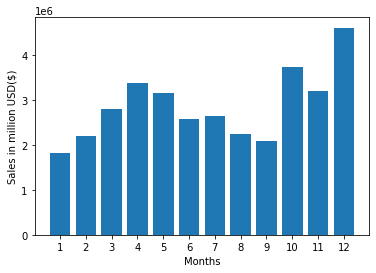

In [61]:
months = range(1,13)
plt.bar(months, res['Sales'])
plt.xticks(months)
plt.xlabel("Months")
plt.ylabel("Sales in million USD($)")
plt.show()

##### Conclusion: Dec had the highest sales and January had the lowest sales

### Task2: City with the highest sales

In [62]:
all_df['City'] = all_df['Purchase Address'].apply(lambda x : f"{x.split(',')[1]} ({x.split(',')[2].split(' ')[1]})")
all_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [63]:
max_sales = all_df.groupby("City").sum()
max_sales["Sales"]

City
 Atlanta (GA)          2795498.58
 Austin (TX)           1819581.75
 Boston (MA)           3661642.01
 Dallas (TX)           2767975.40
 Los Angeles (CA)      5452570.80
 New York City (NY)    4664317.43
 Portland (ME)          449758.27
 Portland (OR)         1870732.34
 San Francisco (CA)    8262203.91
 Seattle (WA)          2747755.48
Name: Sales, dtype: float64

[' Dallas (TX)' ' Boston (MA)' ' Los Angeles (CA)' ' San Francisco (CA)'
 ' Seattle (WA)' ' Atlanta (GA)' ' New York City (NY)' ' Portland (OR)'
 ' Austin (TX)' ' Portland (ME)']


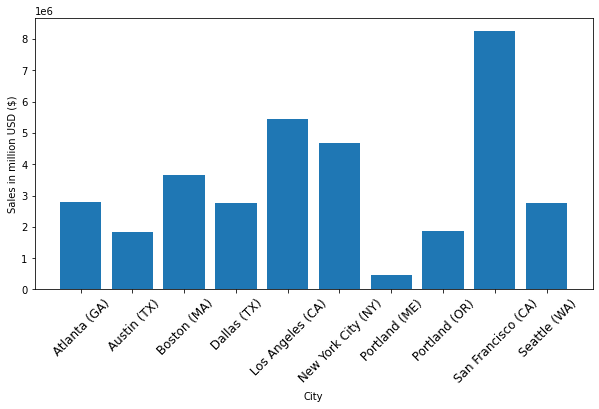

In [65]:
cities = [city for city,df in all_df.groupby('City')] 
print(all_df['City'].unique()) # Cities not in order with Unique()

plt.figure(figsize = (10,5))
plt.bar(cities,max_sales['Sales'])
plt.xticks(cities,rotation = 45, size = 12)
plt.xlabel("City")
plt.ylabel("Sales in million USD ($)")
plt.show()

#### Conclusion: San Francisco (CA) had the highest and Portland (ME) had the lowest sales

### Task 3: Time we should advertise the most for maximising the sales

In [66]:
all_df["Order Date"] = pd.to_datetime(all_df["Order Date"])
all_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA)
11682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
11683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA)


In [67]:
all_df["Hour"] = all_df["Order Date"].dt.hour
all_df["Minute"] = all_df["Order Date"].dt.minute

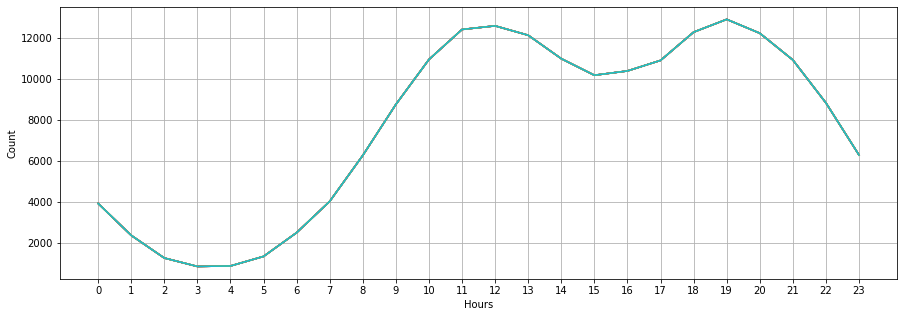

In [68]:
hours = [hour for hour, df in all_df.groupby("Hour")]

plt.figure(figsize = (15,5))
plt.plot(hours, all_df.groupby(["Hour"]).count())
plt.xticks(hours)
plt.xlabel("Hours")
plt.ylabel("Count")
plt.grid()
plt.show()

#### Conclusion: We can advertise at 11 AM or 7 PM as the order count is high at that time it shows most people are active at this time.

### Task 4: Product sold most together

In [69]:
dbl_ord = all_df[all_df["Order ID"].duplicated(keep = False)]

dbl_ord["Grouped"] = dbl_ord.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))

grpd_data = dbl_ord[["Order ID", "Grouped"]].drop_duplicates()

C:\Users\HP\AppData\Local\Temp/ipykernel_16540/3923955526.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbl_ord["Grouped"] = dbl_ord.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))


In [70]:
grpd_data

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
11617,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
11619,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
11627,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
11639,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [22]:
from itertools import combinations
from collections import Counter

count = Counter()

for rows in grpd_data["Grouped"]:
    row_split = rows.split(",")
    count.update(Counter(combinations(row_split,2)))
    
for key, value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Above are the most common things bought together

### Task 5: Product bought most and why?

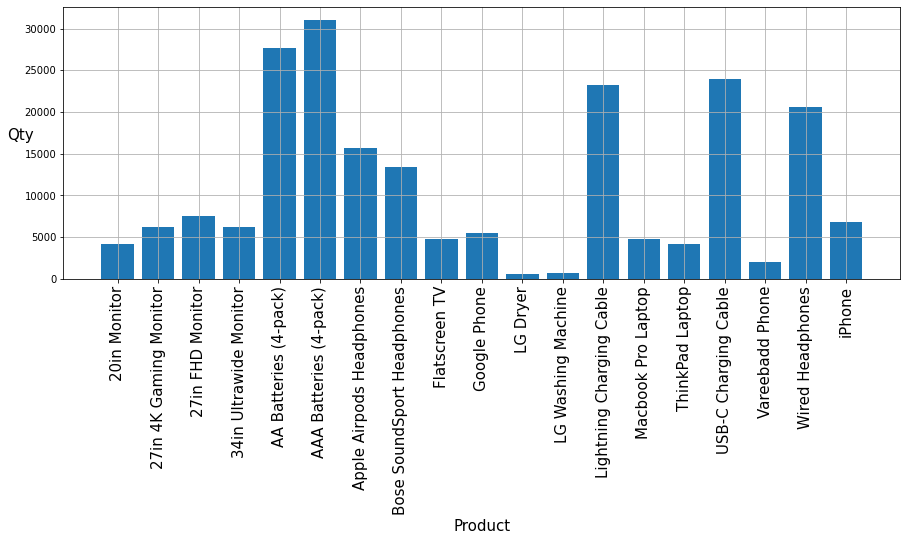

In [28]:
product_group = all_df.groupby('Product')

quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product,df in product_group]
plt.figure(figsize = (15,5))
plt.bar(products,quantity_ordered)
plt.xlabel("Product",size = 15)
plt.ylabel("Qty",rotation = 'horizontal',size = 15)
plt.xticks(products,rotation = "vertical", size = 15)
plt.grid()
plt.show()

['20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor', '34in Ultrawide Monitor', 'AA Batteries (4-pack)', 'AAA Batteries (4-pack)', 'Apple Airpods Headphones', 'Bose SoundSport Headphones', 'Flatscreen TV', 'Google Phone', 'LG Dryer', 'LG Washing Machine', 'Lightning Charging Cable', 'Macbook Pro Laptop', 'ThinkPad Laptop', 'USB-C Charging Cable', 'Vareebadd Phone', 'Wired Headphones', 'iPhone']


C:\Users\HP\AppData\Local\Temp/ipykernel_16540/951100757.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical')


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

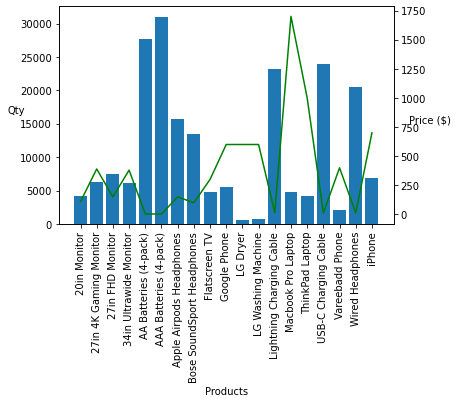

In [49]:
prices = all_df.groupby("Product").mean()["Price Each"]

products = [product for product,df in product_group]

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered)
ax2.plot(products, prices, "g")

ax1.set_xlabel("Products")
ax1.set_ylabel("Qty",rotation = 'horizontal')
ax2.set_ylabel("Price ($)",rotation = 'horizontal')
ax1.set_xticklabels(products, rotation = 'vertical')

#### Conclusions: The high prices for a certain product decreases the sales of the corresponding product